# Importing Libraries

In [1]:
import pandas as pd              #data handling

import numpy as np               # for numeric computing

import matplotlib  as mpl        #for plotting

import matplotlib.pyplot as  plt #for interface plotting

import os                       #for performing operations on file

from glob import glob           # for the pathname matching the specific pattern.

from PIL import Image           #for performing number of operations on the image.

import shutil                   #for performing high-level operation on file. Such as: coping or removing the file

from tensorflow.keras.preprocessing.image import ImageDataGenerator #Importing ImageDataGenerator class from the image module

import seaborn as sns           #importing sea born (for plottin g confusion matrix)

from sklearn.metrics import confusion_matrix  #importing confusion matrix

from sklearn.utils import resample #resampling images

%matplotlib inline

In [2]:
#Dump all files into a folder and specify its path.

#getting current working directory + HAM10000 folder / new created folder
data_dir=os.getcwd()+"/HAM10000/all_images"

#path of the destination directory where we want sub-folder to be.

#getting the current working directory + HAM10000 / sunfolder name
dest_dir=os.getcwd()+"/HAM10000/location_data/reorganized_"

#current directory
print(os.getcwd())

C:\Users\D-19-CS-11\FYP 1


In [3]:
#Read CSV file containing  images (iname id) and corresponding labels(cancer type)...(HAM10000_metadata.csv)

skin_df=pd.read_csv("HAM10000/HAM10000_metadata.csv")

skin_df.head()


,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [4]:
#extract the labels(name of type of the cancer ) in to a list. unique() will put each value once

labels=skin_df["localization"].unique().tolist()

In [5]:
#initializing an empty array in to a variable.

label_images=[]



Copy images into the folders.

In [6]:
#Dump all files into a folder and specify its path.

#getting current working directory + HAM10000 folder / new created folder
#data_dir=os.getcwd()+"/HAM10000/all_images"

#path of the destination directory where we want sub-folder to be.

#getting the current working directory + HAM10000 / sunfolder name
#dest_dir=os.getcwd()+"/HAM10000/location_data/reorganized_"

#extract the labels(name of type of the cancer ) in to a list. unique() will put each value once
#labels=skin_df["localization"].unique().tolist()

#initializing an empty array in to a variable.
#label_images=[]


for i in labels:                                                              #loop through each of the itens in list i.e: i will hold each cancer type one by one
    os.mkdir(dest_dir+str(i)+"/")                                           #making new sub-folder in the destination path that we initialized earlier. Folader will be named after the name of the caner type
    samples=skin_df[skin_df["localization"]==i]["image_id"]               #if the type of the cancer matches the type of cancer that is initialized in in that iteration. Then take the image id of then and store it in a varible that is sample
    label_images.extend(samples)                                          #adding the items of the iterable at the end of the list.
    for ID in label_images:                                               #going through each image id in the nested loop one by one
        shutil.copyfile(data_dir+"/"+ID+".jpg",dest_dir+i+"/"+ID+".jpg") #copying the content from one 
    label_images=[]                                                     #Making the list empty and make ready for new iteration

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\D-19-CS-11\\FYP 1/HAM10000/location_data/reorganized_scalp/'

Now working with the  seprate folders.

In [7]:
#For Keras Datagenrator

#Flow_From_Directory() : This is the methad used to retrive images directly from directiory and into the NN. This is useful when thr images are classified into the folder on the basis of class.
#Identifies class automatically into the folder

# Importing Some Important Packages and Classes

In [8]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator #Importing ImageDataGenerator class from the image module

import os

import matplotlib.pyplot as plt    




Define datgen. where you want to store the applied transformation into..

In [9]:
datagen=ImageDataGenerator()

In [10]:
#Define the training directory that contain the subfolders...

In [11]:
train_dir=os.getcwd()+"/HAM10000/location_data/reorganized_neck/"
print(os.getcwd())

C:\Users\D-19-CS-11\FYP 1


In [12]:
#Using flow from directory to get the images diretly from the sub_folders and feed to the neural network

In [13]:
datagen=ImageDataGenerator()

train_dir=os.getcwd()+"/HAM10000/location_data/reorganized_neck/"
print(os.getcwd())

trained_data_keras=datagen.flow_from_directory(directory=train_dir,      #training data
                                               class_mode="categorical", #mode is set to
                                               batch_size=16,            #16 images at a ime
                                               target_size=(32,32))      #The target size is up to 32 by 32

C:\Users\D-19-CS-11\FYP 1
Found 0 images belonging to 0 classes.


Now we can check images for single batch

In [14]:
x,y=next(trained_data_keras)

In [15]:
len(trained_data_keras)

0

View each image

In [16]:
for i in range(0,15):  #you will increase the range of the plotting
    image=x[i].astype(int)
    plt.imshow(image)
    plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

# MODELLING:

In [17]:
#importing sea born (for plottin g confusion matrix)
import seaborn as sns

#importing confusion matrix
from sklearn.metrics import confusion_matrix

In [18]:
#using random seed

np.random.seed(42)

In [19]:
#importing keras
import keras

#importing to_categorical (to convert class labels in to numbers befor training) # used for converting labels to one-hot-encoding
from keras.utils.np_utils import to_categorical

#importing sequencial from keras model
from keras.models import Sequential

#importing neural network layers from keras.layers
from keras.layers import  Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization  #layes of neural network

#splitting data in to test and train set
from sklearn.model_selection import train_test_split

#importing stats from scioy
from scipy import stats

#from preprocessing module import labelEncoder
from sklearn.preprocessing import LabelEncoder

# neck_meta
making mata data for neck

In [20]:
#storing meta data into a folder
skin_data=pd.read_csv("HAM10000/HAM10000_metadata.csv")
neck_meta=skin_data.loc[skin_data["localization"]=="neck"]  #only storing neck meta data
neck_meta.reset_index() #reset the index starting from zero
#pd.drop(neck_meta["index"])

,index,lesion_id,image_id,dx,dx_type,age,sex,localization
0,164,HAM_0001385,ISIC_0033280,bkl,histo,50.0,female,neck
1,165,HAM_0001385,ISIC_0033212,bkl,histo,50.0,female,neck
2,166,HAM_0001385,ISIC_0033770,bkl,histo,50.0,female,neck
3,195,HAM_0002327,ISIC_0033606,bkl,histo,60.0,female,neck
4,196,HAM_0002327,ISIC_0034103,bkl,histo,60.0,female,neck
...,...,...,...,...,...,...,...,...
163,9796,HAM_0006301,ISIC_0024771,akiec,histo,75.0,male,neck
164,9820,HAM_0006604,ISIC_0030821,akiec,histo,75.0,male,neck
165,9925,HAM_0006301,ISIC_0024468,akiec,histo,75.0,male,neck
166,9927,HAM_0006301,ISIC_0031823,akiec,histo,75.0,male,neck


In [21]:
#making a size variable and storing a value
SIZE=32

In [22]:
#Label encoding from numeric values from text
le=LabelEncoder()

#fitting label encodeer to the data( category)
le.fit(neck_meta["dx"])

LabelEncoder()



LabelEncoder()

In [23]:
#Label encoding from numeric values from text
le=LabelEncoder()

#fitting label encodeer to the data( category)
le.fit(neck_meta["dx"])

LabelEncoder()

print(list(le.classes_))

['akiec', 'bcc', 'bkl', 'mel', 'nv', 'vasc']


In [24]:
#Transforming the the labels in in to encoded form

neck_meta["Label"]=le.transform(neck_meta["dx"]) #It transforms the labels in to the encoded form

print(neck_meta.sample(10))

#Transforming the the labes in in to encoded form

neck_meta["Label"]=le.transform(neck_meta["dx"]) #It transforms the labels in to the encoded form

print(neck_meta.sample(10))

        lesion_id      image_id     dx    dx_type   age     sex localization  \
8508  HAM_0000168  ISIC_0031353     nv      histo  55.0    male         neck   
976   HAM_0001487  ISIC_0031601    bkl  consensus  60.0    male         neck   
7391  HAM_0006379  ISIC_0033990     nv      histo  30.0  female         neck   
831   HAM_0005126  ISIC_0028822    bkl   confocal  65.0    male         neck   
8898  HAM_0002905  ISIC_0029026     nv      histo  40.0    male         neck   
9726  HAM_0004522  ISIC_0028381  akiec      histo  55.0  female         neck   
9820  HAM_0006604  ISIC_0030821  akiec      histo  75.0    male         neck   
2009  HAM_0006870  ISIC_0027793    mel      histo  35.0  female         neck   
6714  HAM_0006439  ISIC_0028423     nv      histo  30.0  female         neck   
2336  HAM_0005713  ISIC_0028714   vasc      histo  60.0  female         neck   

      Label  
8508      4  
976       2  
7391      4  
831       2  
8898      4  
9726      0  
9820      0  
2009   

C:\Users\D-19-C~1\AppData\Local\Temp/ipykernel_7760/355117801.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neck_meta["Label"]=le.transform(neck_meta["dx"]) #It transforms the labels in to the encoded form
C:\Users\D-19-C~1\AppData\Local\Temp/ipykernel_7760/355117801.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neck_meta["Label"]=le.transform(neck_meta["dx"]) #It transforms the labels in to the encoded form


# Data Distribution Visualization

C:\Users\D-19-CS-11\.conda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


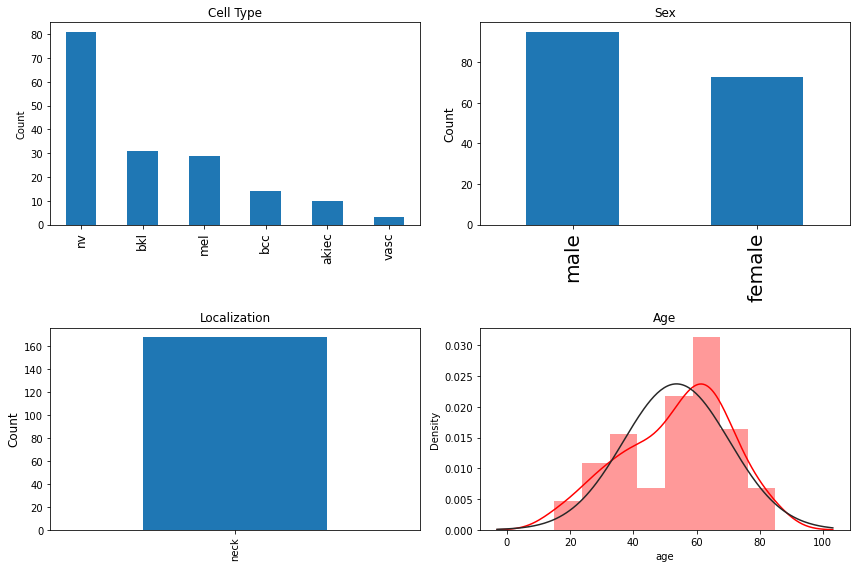

In [25]:
#making a figure using pyplot of 12 by 8
fig=plt.figure(figsize=(12,8))

#making a subplot of type of cancer
ax1=fig.add_subplot(221)
neck_meta["dx"].value_counts().plot(kind="bar",ax=ax1) #plotting a bar plot on the basis of the counted values
plt.xticks(fontsize=12) #changing the fontsize of barchart labels rotation can alos be used
ax1.set_ylabel("Count")
ax1.set_title("Cell Type")

#making a subplot of genders
ax2=fig.add_subplot(222)
neck_meta["sex"].value_counts().plot(kind="bar",ax=ax2)
plt.xticks(fontsize=20)
ax2.set_ylabel("Count",size=12)
ax2.set_title("Sex")

#making a subplot of localization
ax3=fig.add_subplot(223)
neck_meta["localization"].value_counts().plot(kind="bar",ax=ax3)
ax3.set_ylabel("Count",size=12)
ax3.set_title("Localization")

#making age plot using seaborn
ax4=fig.add_subplot(224)
sample_age=neck_meta[pd.notnull(neck_meta["age"])]
sns.distplot(sample_age["age"],fit=stats.norm,color="red")
ax4.set_title("Age",size=12)

plt.tight_layout()
plt.show()

# Distributing data into various classes


In [26]:
from sklearn.utils import resample
print(neck_meta["Label"].value_counts())  #counting the labels



4    81
2    31
3    29
1    14
0    10
5     3
Name: Label, dtype: int64


In [27]:
#Balance data.
# Many ways to balance data... 


In [28]:
#Separate each classes, resample, and combine back into single dataframe

In [29]:
# First seprating each class and storing it in a variable

df_0=neck_meta[neck_meta["Label"]==0]
df_1=neck_meta[neck_meta["Label"]==1]
df_2=neck_meta[neck_meta["Label"]==2]
df_3=neck_meta[neck_meta["Label"]==3]
df_4=neck_meta[neck_meta["Label"]==4]
df_5=neck_meta[neck_meta["Label"]==5]
df_6=neck_meta[neck_meta["Label"]==6]

In [30]:
#Secoond step is resampling

df0_balanced= resample(df_0,replace=True, n_samples=50,random_state=42) #replace sample with the random permutation,
                                                        #n_sample: number of sample generated if true it will adjust the length , 
                                                        #random_state: will set up the random state
df1_balanced = resample(df_1, n_samples=50, replace=True, random_state=42) 
df2_balanced = resample(df_2, n_samples=50, replace=True, random_state=42)
df3_balanced = resample(df_3, n_samples=50, replace=True, random_state=42)
df4_balanced = resample(df_4, n_samples=50, replace=True, random_state=42)
df5_balanced = resample(df_5, n_samples=50, replace=True, random_state=42)




In [31]:
#Third step is combining all the small dataframes into a single dataframe

neck_meta_balanced=pd.concat([df0_balanced, df1_balanced, 
                              df2_balanced, df3_balanced, 
                              df4_balanced, df5_balanced])

In [32]:
neck_meta_balanced=neck_meta_balanced.reset_index()
neck_meta_balanced

,index,lesion_id,image_id,dx,dx_type,age,sex,localization,Label
0,9820,HAM_0006604,ISIC_0030821,akiec,histo,75.0,male,neck,0
1,9726,HAM_0004522,ISIC_0028381,akiec,histo,55.0,female,neck,0
2,9925,HAM_0006301,ISIC_0024468,akiec,histo,75.0,male,neck,0
3,9783,HAM_0002648,ISIC_0027650,akiec,histo,40.0,male,neck,0
4,9820,HAM_0006604,ISIC_0030821,akiec,histo,75.0,male,neck,0
...,...,...,...,...,...,...,...,...,...
295,2424,HAM_0002177,ISIC_0025612,vasc,consensus,45.0,female,neck,5
296,2337,HAM_0005713,ISIC_0030956,vasc,histo,60.0,female,neck,5
297,2336,HAM_0005713,ISIC_0028714,vasc,histo,60.0,female,neck,5
298,2337,HAM_0005713,ISIC_0030956,vasc,histo,60.0,female,neck,5


In [33]:
#Check the distribution. All classes should be balanced now.
print(neck_meta_balanced["Label"].value_counts())

0    50
1    50
2    50
3    50
4    50
5    50
Name: Label, dtype: int64


In [34]:
#Now time to read images based on image ID from the CSV file

In [35]:
#This is the safest way to read images as it ensures the right image is read for the right ID

In [36]:
image_path={os.path.splitext(os.path.basename(x))[0]:x #spLITING the pathe name and getting the basename
                           for x in glob(os.path.join("HAM10000/location_data/reorganized_neck","*.jpg"))}#joint wil combine all the componenets seprated by /.
                                                                                                              #glob will find all the path name matching the specific pattern

In [37]:
image_path

{'ISIC_0024460': 'HAM10000/location_data/reorganized_neck\\ISIC_0024460.jpg',
 'ISIC_0024468': 'HAM10000/location_data/reorganized_neck\\ISIC_0024468.jpg',
 'ISIC_0024536': 'HAM10000/location_data/reorganized_neck\\ISIC_0024536.jpg',
 'ISIC_0024588': 'HAM10000/location_data/reorganized_neck\\ISIC_0024588.jpg',
 'ISIC_0024697': 'HAM10000/location_data/reorganized_neck\\ISIC_0024697.jpg',
 'ISIC_0024733': 'HAM10000/location_data/reorganized_neck\\ISIC_0024733.jpg',
 'ISIC_0024771': 'HAM10000/location_data/reorganized_neck\\ISIC_0024771.jpg',
 'ISIC_0024829': 'HAM10000/location_data/reorganized_neck\\ISIC_0024829.jpg',
 'ISIC_0024863': 'HAM10000/location_data/reorganized_neck\\ISIC_0024863.jpg',
 'ISIC_0024940': 'HAM10000/location_data/reorganized_neck\\ISIC_0024940.jpg',
 'ISIC_0024971': 'HAM10000/location_data/reorganized_neck\\ISIC_0024971.jpg',
 'ISIC_0025087': 'HAM10000/location_data/reorganized_neck\\ISIC_0025087.jpg',
 'ISIC_0025094': 'HAM10000/location_data/reorganized_neck\\ISIC_

In [38]:
#Define the path and add to a new column.

In [39]:
neck_meta_balanced["Path"]=neck_meta_balanced["image_id"].map(image_path.get)

In [40]:
neck_meta_balanced.head()
#Use the path to read images.

,index,lesion_id,image_id,dx,dx_type,age,sex,localization,Label,Path
0,9820,HAM_0006604,ISIC_0030821,akiec,histo,75.0,male,neck,0,HAM10000/location_data/reorganized_neck\ISIC_0...
1,9726,HAM_0004522,ISIC_0028381,akiec,histo,55.0,female,neck,0,HAM10000/location_data/reorganized_neck\ISIC_0...
2,9925,HAM_0006301,ISIC_0024468,akiec,histo,75.0,male,neck,0,HAM10000/location_data/reorganized_neck\ISIC_0...
3,9783,HAM_0002648,ISIC_0027650,akiec,histo,40.0,male,neck,0,HAM10000/location_data/reorganized_neck\ISIC_0...
4,9820,HAM_0006604,ISIC_0030821,akiec,histo,75.0,male,neck,0,HAM10000/location_data/reorganized_neck\ISIC_0...


In [42]:
Size=32 #size is 32 x 32
#len(neck_meta_balanced["Path"].map(lambda x: np.asarray(Image.open(x).resize((Size,Size))))[0]) #32 is the size
neck_meta_balanced["Image"]=neck_meta_balanced["Path"].map(lambda x: np.asarray(Image.open(x).resize((Size,Size))))
#opening each image from the path in an array one by one using map function.
#then resizing it.
#Image is imported from the pillow

neck_meta_balanced.head()


,index,lesion_id,image_id,dx,dx_type,age,sex,localization,Label,Path,Image
0,9820,HAM_0006604,ISIC_0030821,akiec,histo,75.0,male,neck,0,HAM10000/location_data/reorganized_neck\ISIC_0...,"[[[187, 157, 181], [189, 160, 181], [188, 160,..."
1,9726,HAM_0004522,ISIC_0028381,akiec,histo,55.0,female,neck,0,HAM10000/location_data/reorganized_neck\ISIC_0...,"[[[183, 159, 148], [193, 174, 163], [208, 192,..."
2,9925,HAM_0006301,ISIC_0024468,akiec,histo,75.0,male,neck,0,HAM10000/location_data/reorganized_neck\ISIC_0...,"[[[237, 141, 160], [237, 148, 169], [238, 157,..."
3,9783,HAM_0002648,ISIC_0027650,akiec,histo,40.0,male,neck,0,HAM10000/location_data/reorganized_neck\ISIC_0...,"[[[178, 133, 149], [177, 133, 148], [178, 131,..."
4,9820,HAM_0006604,ISIC_0030821,akiec,histo,75.0,male,neck,0,HAM10000/location_data/reorganized_neck\ISIC_0...,"[[[187, 157, 181], [189, 160, 181], [188, 160,..."


# PLOTTING IMAGES

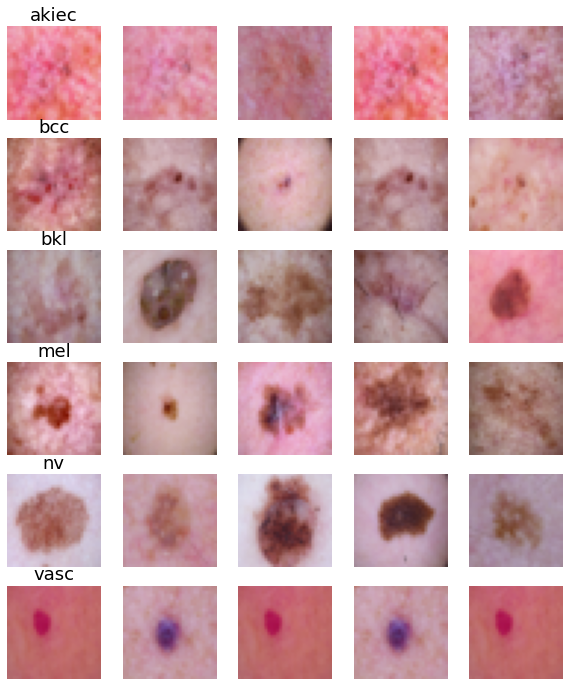

In [48]:
# number of samples for plotting
n_sample=5

#Plotting
fig, m_axes = plt.subplots(6, n_sample, figsize = (2*n_sample, 2*6) )#7 is rows and types of cancer
                                                                      #n_samples is columns and numbers of images
                                                                      #artboard is stored in fig and axes is stored in m_axes
        
#print("Axes shows the rows and columns") 
#print(m_axs)

#print("Figuressss")
#print(fig)


for n_axes, (type_name,type_rows) in zip(m_axes,neck_meta_balanced.sort_values(["dx"]).groupby("dx")):
                                                                   #Sort the values on the basis of cancer type
                                                                   #groupby is returning an object we are taking name and row from it
                                                                   #groupby returns an object which consists of type_name and type_row
            
    
    n_axes[0].set_title(type_name,fontsize=18)
    
    for c_axes,(c_name,c_rows) in zip(n_axes,type_rows.sample(n_sample,random_state=1234).iterrows()):
        
                                                   # n_sample is the number of samples to show
                                                   #random_state is used to set up the save the staet of randomization
                    
    
                                                                   
        
         c_axes.imshow(c_rows["Image"])                  #imshow() is reading the image code
         c_axes.axis("off")
        
                                                                    
                                                                    
            
            
                   


# Convert dataframe column of images into numpy array

####  creating Scaling Function

In [98]:
#USING method StandardScaler TO STANDARIZE THE VALUES
#We can use other scaling method but thoese methods ar requiring y arguments as well
#So to tackle that I made my own scaling function
# Scale values to 0-1.
#X=X/255
#255 is maximum pixel

def img_scaler(i):
    s_img=i/255
    return s_img

    


In [186]:


#display(neck_meta_balanced.head)

#forming array of all the images and storing in to a list
X=np.asarray(neck_meta_balanced["Image"].tolist()) #only scaling the images

print(X)
#calling image scaler
x= img_scaler(X)


#Assigning the label values to Y
Y=neck_meta_balanced["Label"]

#Converting labels to categorical as it is a multi class classification
Y_cate=to_categorical(Y,num_classes=6) #By num_classes we are specifying the number of classes 

[[[[187 157 181]
   [189 160 181]
   [188 160 176]
   ...
   [155 114 123]
   [142  88  98]
   [136  75  87]]

  [[194 172 193]
   [192 163 185]
   [193 163 183]
   ...
   [154 109 119]
   [149 101 109]
   [149 107 116]]

  [[194 173 195]
   [195 172 196]
   [195 162 184]
   ...
   [153 100 111]
   [157 115 122]
   [152 117 128]]

  ...

  [[162 107 123]
   [165 111 127]
   [173 131 148]
   ...
   [156 118 128]
   [136  82  95]
   [130  75  89]]

  [[163 115 132]
   [168 122 137]
   [172 135 149]
   ...
   [145  98 111]
   [134  80  92]
   [130  80  89]]

  [[165 122 140]
   [171 138 152]
   [172 141 152]
   ...
   [146 101 112]
   [134  88  98]
   [127  82  92]]]


 [[[183 159 148]
   [193 174 163]
   [208 192 183]
   ...
   [204 175 161]
   [210 184 172]
   [197 165 153]]

  [[186 163 153]
   [196 176 168]
   [207 190 180]
   ...
   [207 179 168]
   [203 173 161]
   [201 170 159]]

  [[184 160 153]
   [193 174 167]
   [208 191 183]
   ...
   [209 181 171]
   [206 177 168]
   [196 163

AttributeError: 'numpy.ndarray' object has no attribute 'read'

# Training and Testing Set

In [100]:
#Converting the data into training and testing set

x_train,x_test,y_train,y_test=train_test_split(x,Y_cate,test_size=0.2,random_state=42)
print(x_train.shape)

(240, 32, 32, 3)


# ORGANIZING THE LAYERS

In [101]:
#Define the model.

In [102]:
#we can use auto keras for the best model but currently we dont havebest GPU, therefore I will be using my frequently used model

### Creating aModel

In [103]:
#number of classes
n_classes=6

#storing sequential in a variable
model=Sequential() 

#Inputlayer
model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(SIZE, SIZE, 3)))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

#HIDDEN LAYERS
model.add(Conv2D(128, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))
model.add(Flatten())

#OUTPUT Layer
model.add(Dense(32))
model.add(Dense(n_classes, activation='softmax'))

In [104]:
#Summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 256)       7168      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 256)       0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 128)       295040    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)         

### Compiling The Model

In [105]:
#CCOMPILING THE MODEL

model.compile(loss="categorical_crossentropy",optimizer="Adam",metrics=['acc'])
#loss fuctionon the model
#using model optimizer Adam
#In metric we specify the accuracy

# TRAINING The Model

In [106]:
#batch size
batch_size=16

#number of iteration over the data
epochs=50

history=model.fit(x_train,y_train,
                      epochs=epochs,
                      verbose=2,
                      batch_size=batch_size,
                      validation_data=(x_test,y_test))

Epoch 1/50
15/15 - 3s - loss: 1.8405 - acc: 0.1583 - val_loss: 1.7949 - val_acc: 0.1667
Epoch 2/50
15/15 - 2s - loss: 1.7912 - acc: 0.2042 - val_loss: 1.7886 - val_acc: 0.1167
Epoch 3/50
15/15 - 2s - loss: 1.7992 - acc: 0.1667 - val_loss: 1.7934 - val_acc: 0.2167
Epoch 4/50
15/15 - 2s - loss: 1.7880 - acc: 0.1917 - val_loss: 1.7774 - val_acc: 0.2833
Epoch 5/50
15/15 - 2s - loss: 1.7892 - acc: 0.1875 - val_loss: 1.7727 - val_acc: 0.2333
Epoch 6/50
15/15 - 2s - loss: 1.7602 - acc: 0.2500 - val_loss: 1.7332 - val_acc: 0.2500
Epoch 7/50
15/15 - 2s - loss: 1.7069 - acc: 0.3042 - val_loss: 1.7352 - val_acc: 0.2333
Epoch 8/50
15/15 - 2s - loss: 1.6255 - acc: 0.3125 - val_loss: 1.5338 - val_acc: 0.3833
Epoch 9/50
15/15 - 2s - loss: 1.5856 - acc: 0.2417 - val_loss: 1.4952 - val_acc: 0.3833
Epoch 10/50
15/15 - 2s - loss: 1.5222 - acc: 0.3500 - val_loss: 1.3986 - val_acc: 0.4833
Epoch 11/50
15/15 - 2s - loss: 1.4133 - acc: 0.3542 - val_loss: 1.3895 - val_acc: 0.4333
Epoch 12/50
15/15 - 2s - loss:

### Saving the Trained Model

In [109]:
model.save("skin_cancer_model.h5")

# plot the training and validation  loss at each epoch

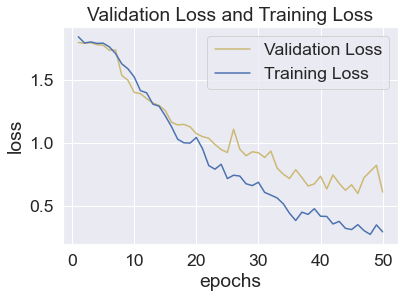

In [110]:
#storing loss in a loss variable
loss=history.history["loss"]

#storing value loss
val_loss=history.history["val_loss"]

#numbers of iterations
epoch=range(1,len(loss)+1)

#plotting in line plot for loses

plt.plot(epoch,val_loss,"y",label="Validation Loss")   #Validation Loss

plt.plot(epoch,loss,"b",label="Training Loss")        #Training Loss

plt.title("Validation Loss and Training Loss")

plt.xlabel("epochs")
plt.ylabel("loss")

plt.legend()
plt.show()


# Now plotting for training and validation accuracy

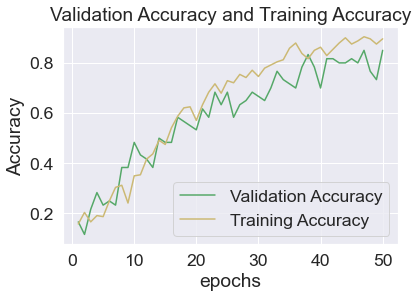

In [111]:
#plotting accuracies

val_acc=history.history["val_acc"] #storing validation accuracy

acc=history.history["acc"]         #storing traing accuracy

epochs=range(1,len(acc)+1)

plt.plot(epochs,val_acc,"g",label="Validation Accuracy")

plt.plot(epochs,acc,"y",label="Training Accuracy")

plt.title("Validation Accuracy and Training Accuracy")

plt.xlabel("epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

# PREDICTION

In [148]:
display(x_test)
#Predicting on the test data

#Remainder:For random input visit train and testing data sepration cell(This will help me in deploying phase)

y_pred=model.predict(x_test)



array([[[[0.81777778, 0.71555556, 0.81333333],
         [0.81333333, 0.69333333, 0.79555556],
         [0.80444444, 0.67555556, 0.76444444],
         ...,
         [0.76888889, 0.58222222, 0.67555556],
         [0.77333333, 0.59555556, 0.68888889],
         [0.76      , 0.59555556, 0.69333333]],

        [[0.81333333, 0.70222222, 0.78222222],
         [0.81333333, 0.68444444, 0.76888889],
         [0.79555556, 0.64888889, 0.74666667],
         ...,
         [0.77777778, 0.60444444, 0.70666667],
         [0.77333333, 0.6       , 0.68      ],
         [0.77777778, 0.61777778, 0.72      ]],

        [[0.81333333, 0.68888889, 0.76      ],
         [0.79111111, 0.63555556, 0.71111111],
         [0.8       , 0.64444444, 0.73333333],
         ...,
         [0.79111111, 0.64      , 0.74222222],
         [0.80444444, 0.66666667, 0.76444444],
         [0.78666667, 0.62666667, 0.72888889]],

        ...,

        [[0.70666667, 0.53777778, 0.62222222],
         [0.76888889, 0.64444444, 0.74666667]

In [113]:
#converting y_pred in to one hot vector using argmax(), axis=1 is line wise
y_pred_vect=np.argmax(y_pred, axis=1)

#converting y_test in to one hot vector also using argmax()
y_test_vect=np.argmax(y_test,axis=1)



# Plotting Confusion Matrix using seaborns

<AxesSubplot:>

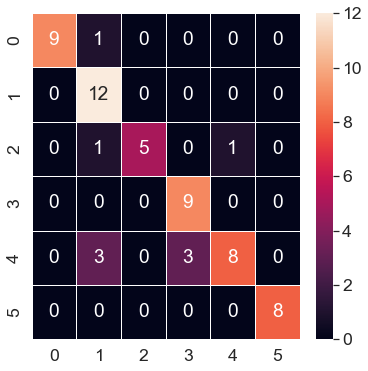

In [114]:
#importing sea born (for plottin g confusion matrix)
import seaborn as sns

#importing confusion matrix
from sklearn.metrics import confusion_matrix

#storing confusion matrix in a variable
cm=confusion_matrix(y_test_vect,y_pred_vect)

#Creating a figure
fig,axs=plt.subplots(figsize=(6,6))

sns.set(font_scale=1.6)
sns.heatmap(cm,annot=True,linewidth=.5,ax=axs)
#annot=True wull write the value inside every box
#line_width will seprate every box

# Friction of incorrect classification Preciction.

Text(0.5, 1.0, 'Incorrect Preciction Per lable')

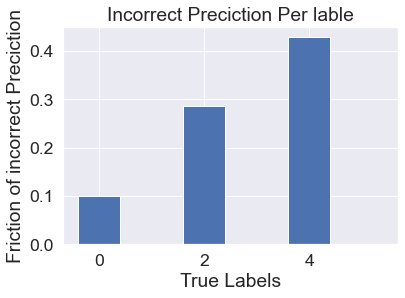

In [115]:
incorrect_prediction=1-np.diag(cm)/np.sum(cm,axis=1)

#bar plot
plt.bar(np.arange(6),incorrect_prediction)

plt.xlabel("True Labels")
plt.ylabel("Friction of incorrect Preciction")

plt.title("Incorrect Preciction Per lable")

In [116]:
from sklearn.metrics import accuracy_score


score=accuracy_score(y_test_vect,y_pred_vect)

print("Your Model Prediction Accuracy is: %.f"%(score*100))


Your Model Prediction Accuracy is: 85


In [124]:
#You can use pickle to save if there is the object rather than function

# Deployment of the model

### Loading the model

In [21]:
import numpy as np
from PIL import Image

In [22]:

from tensorflow.keras.models import load_model

cancer_model=load_model("skin_cancer_model.h5")

### Creating image scaling function 

In [23]:
#from scaler import img_scaler



def img_scaler(i):
    test1=np.asarray(Image.open(i).resize((32,32))) #OPening the image, resizing it and forming a numpy array of the input image
    s_img=test1/225
    image_resize = np.expand_dims(s_img, axis=0)
    return image_resize


In [24]:
img_scaler("Test_images/img1.jpg")



array([[[[0.92      , 0.44      , 0.53777778],
         [0.92888889, 0.44444444, 0.54222222],
         [0.93333333, 0.46222222, 0.55111111],
         ...,
         [0.94222222, 0.51555556, 0.55555556],
         [0.96      , 0.55555556, 0.59555556],
         [0.92888889, 0.52444444, 0.53777778]],

        [[0.90666667, 0.41333333, 0.51111111],
         [0.92444444, 0.44      , 0.53333333],
         [0.93333333, 0.46222222, 0.53777778],
         ...,
         [0.93777778, 0.52      , 0.54222222],
         [0.95555556, 0.56444444, 0.59555556],
         [0.93777778, 0.54222222, 0.55555556]],

        [[0.92      , 0.44888889, 0.53333333],
         [0.94222222, 0.49333333, 0.57333333],
         [0.95555556, 0.52      , 0.58222222],
         ...,
         [0.93777778, 0.51111111, 0.54666667],
         [0.94666667, 0.54222222, 0.57333333],
         [0.95555556, 0.56888889, 0.58666667]],

        ...,

        [[0.89333333, 0.53333333, 0.49777778],
         [0.88888889, 0.49777778, 0.47111111]

In [13]:
#getting the names of the encoded classes

le.classes_    #le: endoded that we used earlier

NameError: name 'le' is not defined

In [25]:
#defining the prediction model

In [28]:
def prediction_model(input_img,cancer_model,img_scaler):
    
    class_name=np.array(['Actinic keratoses (akiec)', 'Basal cell carcinoma (bcc)', 'Benign Keratosis-like lesions (bkl)', 'Melanoma (mel)', 'Melanocytic nevi (nv)', 'Vascular lesions (vas)'])
    
    neck_samp=input_img
    v1=img_scaler(neck_samp)
    
    out=cancer_model.predict_classes(v1)[0]    #predict classes will predict the classes. Otherwise it will show some normalized data
                                            #returning first index
        
    return class_name[out]   
    
    

In [29]:
prediction_model("Test_images/img1.jpg",cancer_model,img_scaler)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


'nv'

# Final Code deployment

In [3]:
#Importing linraries
import numpy as np
from PIL import Image

#Loading Skin cancer model
from tensorflow.keras.models import load_model
cancer_model=load_model("skin_cancer_model.h5")





#Prediction Model
def prediction_model(input_img,cancer_model):

    
    #Resizing and scaling function
    def img_scaler(input_img):
        test1=np.asarray(Image.open(input_img).resize((32,32))) #OPening the image, resizing it and forming a numpy array of the input image
        s_img=test1/225
        image_resize = np.expand_dims(s_img, axis=0)
        return image_resize
    
    
    class_name=np.array(['Actinic keratoses (akiec)', 'Basal cell carcinoma (bcc)', 'Benign Keratosis-like lesions (bkl)', 'Melanoma (mel)', 'Melanocytic nevi (nv)', 'Vascular lesions (vas)'])
    
    neck_samp=input_img
    v1=img_scaler(neck_samp)
    
    out=cancer_model.predict_classes(v1)[0]    #predict classes will predict the classes. Otherwise it will show some normalized data
                                               #returning first index
        
    return class_name[out]   
    
    
#Predicting
prediction_model("Test_images/img3.jpg",cancer_model)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


'Melanocytic nevi (nv)'